In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mode, skew, kurtosis

In [ ]:
# Load the dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Statistics/Datasets/Concrete_Data - Sheet1.xlsx")  # Adjust path if needed

In [ ]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## **TASK 1**

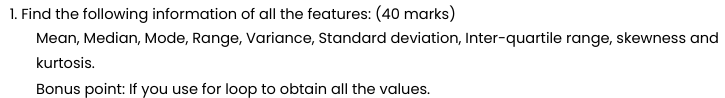

In [ ]:
# Clean column names
df.columns = [col.strip() for col in df.columns]

# Initialize list to collect rows
stats_list = []

# Loop through columns and compute stats
for col in df.columns:
    data = df[col]
    stats_list.append([
        col,
        round(data.mean(), 3),
        round(data.median(), 3),
        round(mode(data, keepdims=False).mode, 3) if not data.empty else np.nan,
        round(data.max() - data.min(), 3),
        round(data.var(), 3),
        round(data.std(), 3),
        round(data.quantile(0.75) - data.quantile(0.25), 3),
        round(skew(data), 3),
        round(kurtosis(data), 3)
    ])

# Create a DataFrame from the list
stats_df = pd.DataFrame(stats_list, columns=[
    'Feature',
    'Mean',
    'Median',
    'Mode',
    'Range',
    'Variance',
    'Standard Deviation',
    'IQR',
    'Skewness',
    'Kurtosis'
])

# Display the final formatted table
print("Descriptive Statistics Table:\n")
print(stats_df.to_string(index=False))


Descriptive Statistics Table:

                                              Feature    Mean  Median  Mode  Range  Variance  Standard Deviation     IQR  Skewness  Kurtosis
            Cement (component 1)(kg in a m^3 mixture) 281.168 272.900 362.6 438.00 10921.580             104.506 157.625     0.509    -0.524
Blast Furnace Slag (component 2)(kg in a m^3 mixture)  73.896  22.000   0.0 359.40  7444.125              86.279 142.950     0.800    -0.512
           Fly Ash (component 3)(kg in a m^3 mixture)  54.188   0.000   0.0 200.10  4095.617              63.997 118.300     0.537    -1.328
            Water  (component 4)(kg in a m^3 mixture) 181.567 185.000 192.0 125.20   456.003              21.354  27.100     0.075     0.116
  Superplasticizer (component 5)(kg in a m^3 mixture)   6.205   6.400   0.0  32.20    35.687               5.974  10.200     0.906     1.399
 Coarse Aggregate  (component 6)(kg in a m^3 mixture) 972.919 968.000 932.0 344.00  6045.677              77.754  97.400   

## **TASK 3**

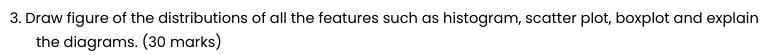

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

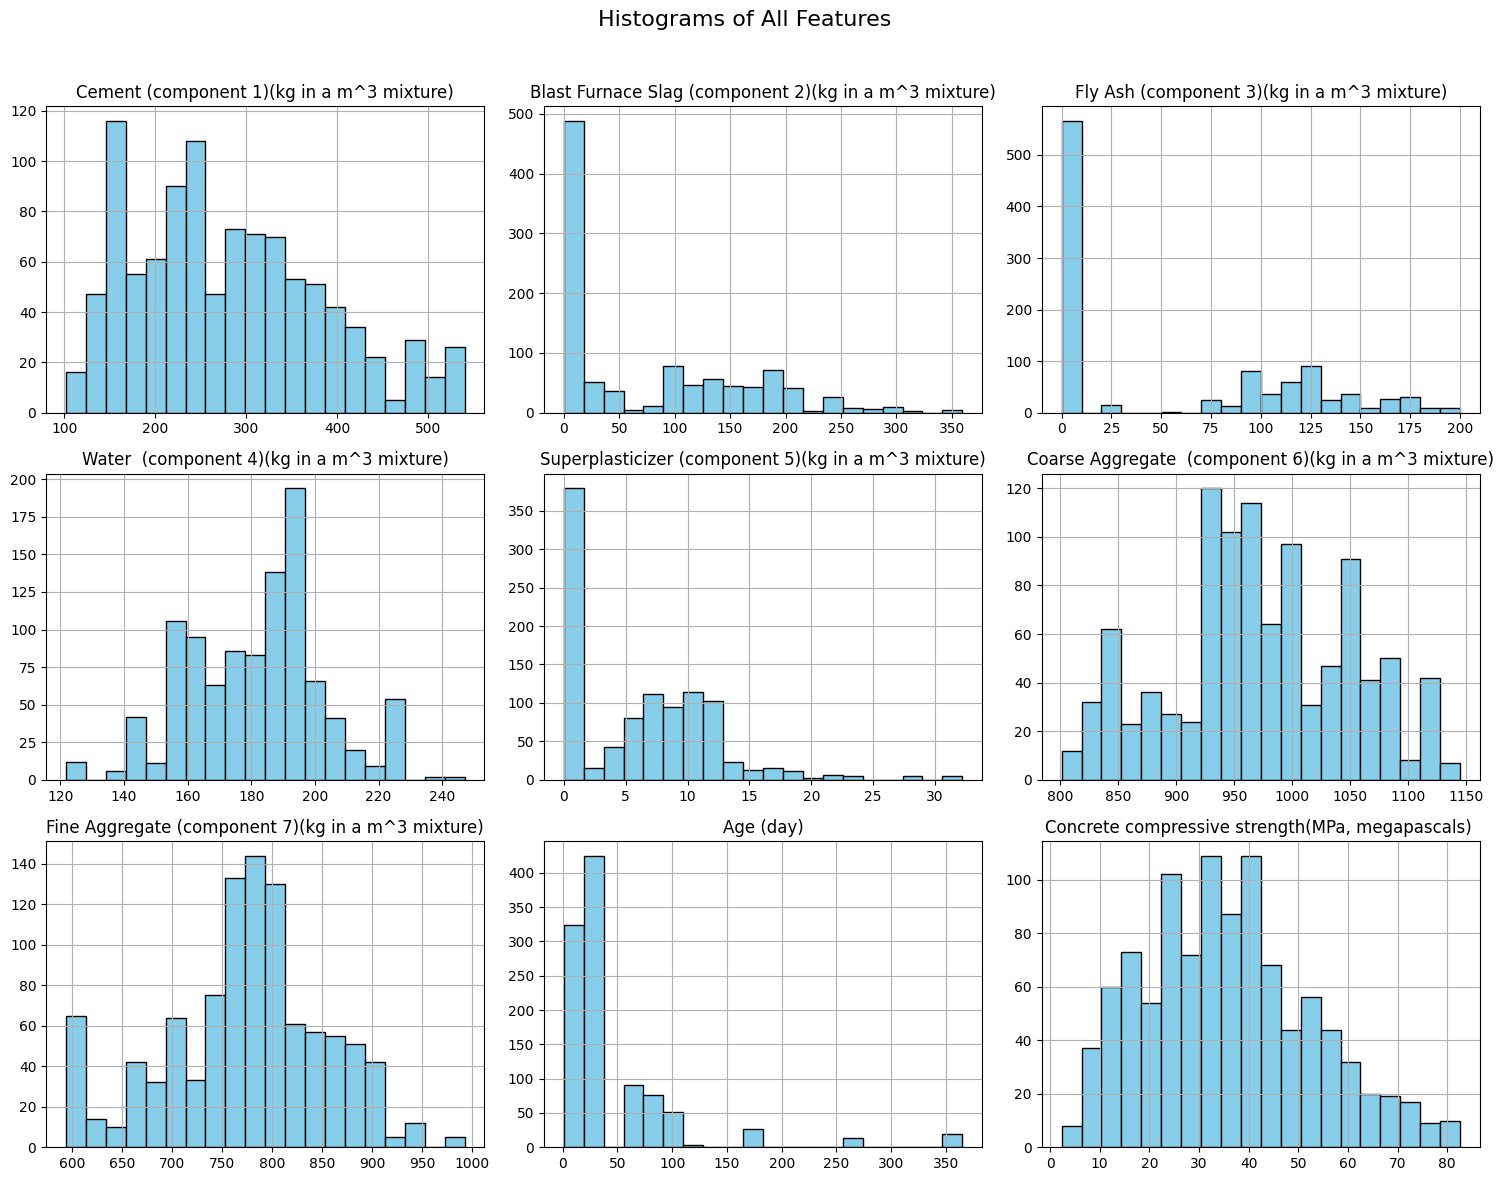

In [ ]:
# Plot histograms
df.hist(bins=20, figsize=(15, 12), edgecolor='black', color='skyblue')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Boxplots**

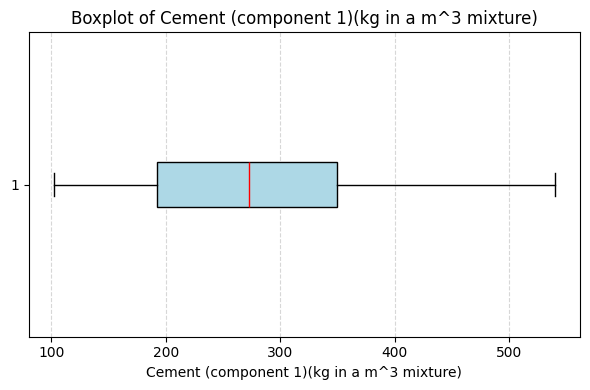

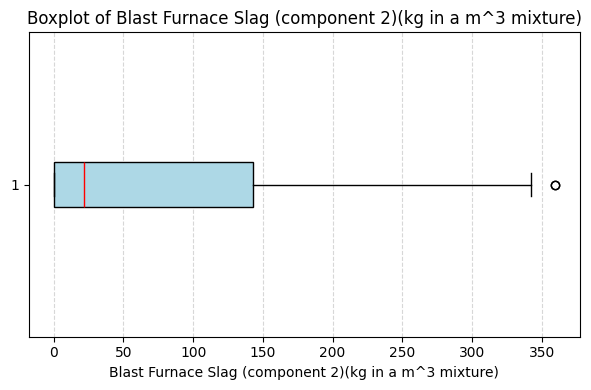

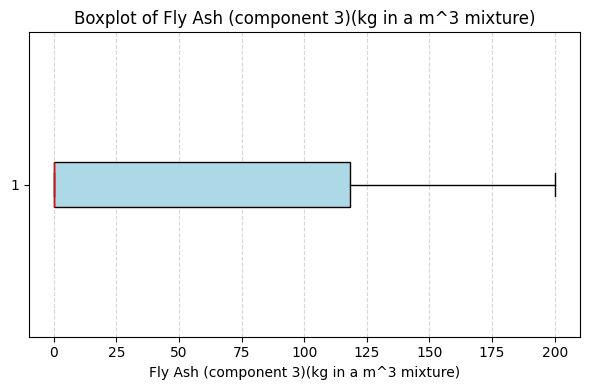

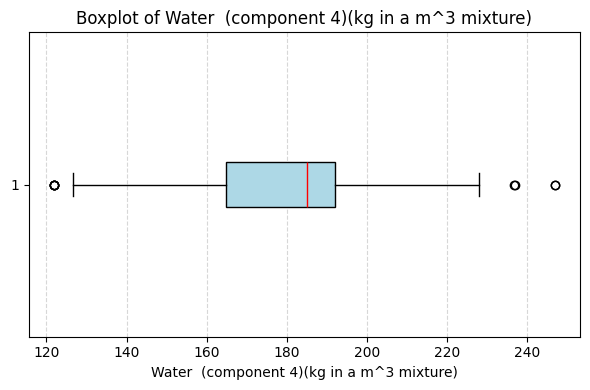

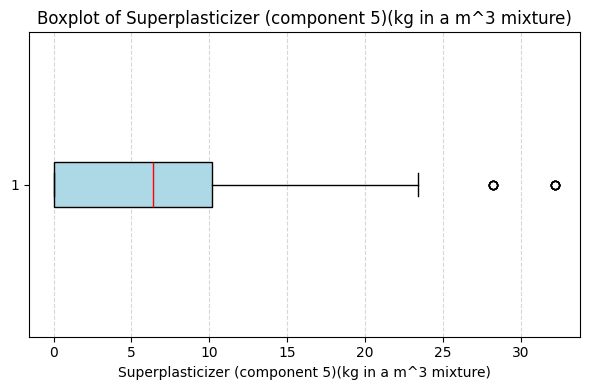

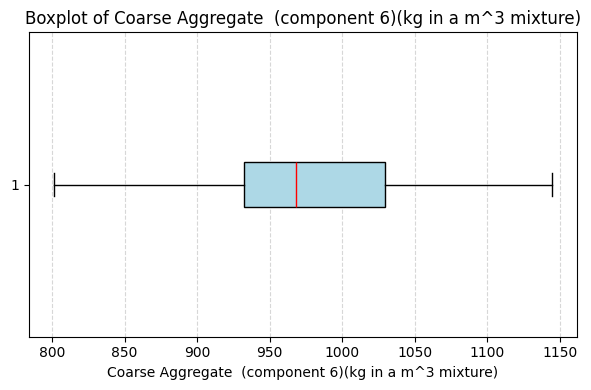

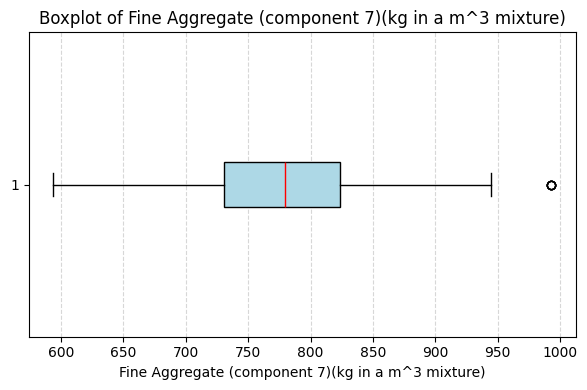

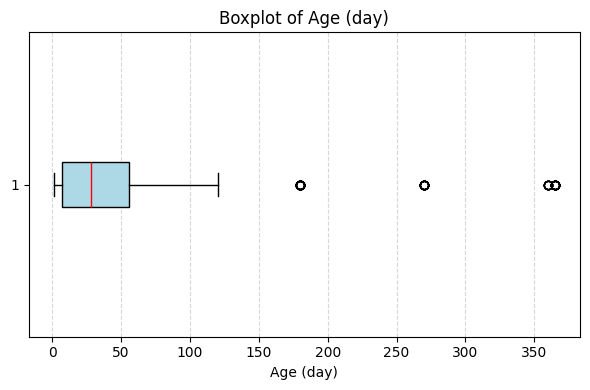

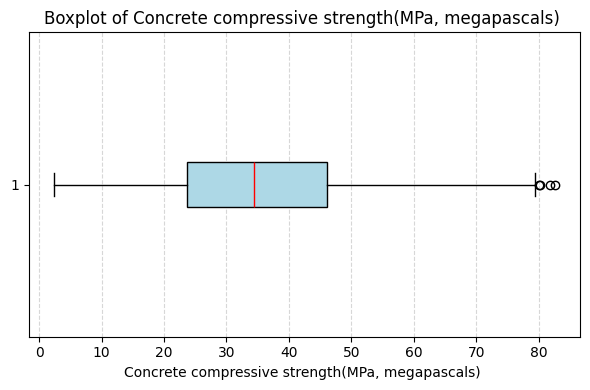

In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot for each feature with labels
for col in df.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red'))
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


**Scatterplots**

In [ ]:
df.columns = [col.strip() for col in df.columns]

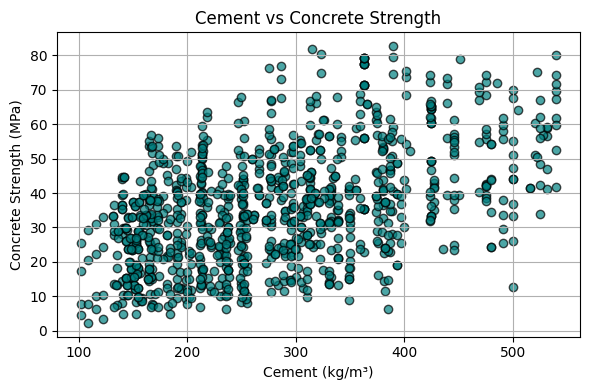

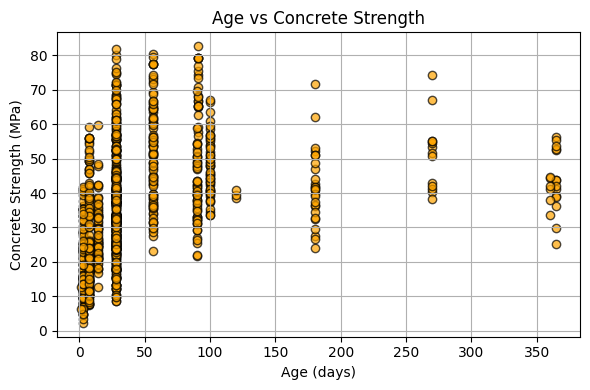

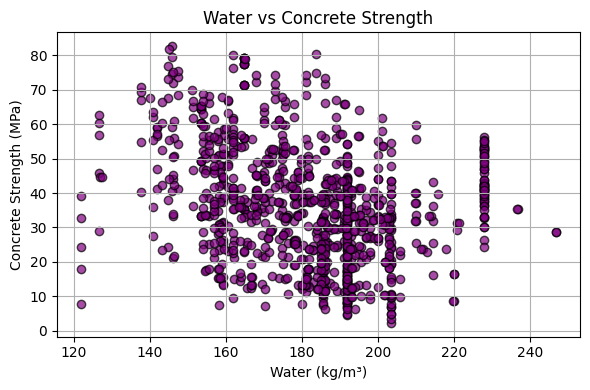

In [ ]:
# Scatter Plot 1: Cement vs Strength
plt.figure(figsize=(6, 4))
plt.scatter(df['Cement (component 1)(kg in a m^3 mixture)'], df['Concrete compressive strength(MPa, megapascals)'],
            alpha=0.7, edgecolor='black', color='teal')
plt.xlabel("Cement (kg/m³)")
plt.ylabel("Concrete Strength (MPa)")
plt.title("Cement vs Concrete Strength")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot 2: Age vs Strength
plt.figure(figsize=(6, 4))
plt.scatter(df['Age (day)'], df['Concrete compressive strength(MPa, megapascals)'],
            alpha=0.7, edgecolor='black', color='orange')
plt.xlabel("Age (days)")
plt.ylabel("Concrete Strength (MPa)")
plt.title("Age vs Concrete Strength")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot 3: Water vs Strength
plt.figure(figsize=(6, 4))
plt.scatter(df['Water  (component 4)(kg in a m^3 mixture)'], df['Concrete compressive strength(MPa, megapascals)'],
            alpha=0.7, edgecolor='black', color='purple')
plt.xlabel("Water (kg/m³)")
plt.ylabel("Concrete Strength (MPa)")
plt.title("Water vs Concrete Strength")
plt.grid(True)
plt.tight_layout()
plt.show()
